In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Read the data from the JSON file
data = pd.read_json('json/df_sentences.json')


In [15]:
data_temp = data.copy()
# Eliminar los guiones de la columna iskonawa_verb
data_temp['iskonawa_verb'] = data['iskonawa_verb'].str.replace('-', '')
data_temp

,index,iskonawa_sentence,suffix_sentence,annotated_sentence,spanish_sentence,reference,key,POS,POS_annotated,verbs_info,verbs_details,verb_abbreviations,verb_features,iskonawa_verb,iskonawa_verb_temp,found_verbs
0,39,German ka kahe mena iki,German ka kahe mena iki,flaco EVI.1 casa dentro COP,Germán está dentro de la casa,Bosquejo Gramatical,BG39,Germán/PROPN está/VERB dentro/ADV de/ADP la/DE...,flaco/ADJ EVI.1/PROPN casa/NOUN dentro/ADV COP...,"[{'Text': 'está', 'Lemma': 'estar', 'POS': 'VE...","[{'Tense': ['Pres'], 'Person': ['3'], 'Number'...","[EVI.1, COP]","[EVI.1, COP]",ka,ka,[kai]
1,39,German ka kahe mena iki,German ka kahe mena iki,flaco EVI.1 casa dentro COP,Germán está dentro de la casa,Bosquejo Gramatical,BG39,Germán/PROPN está/VERB dentro/ADV de/ADP la/DE...,flaco/ADJ EVI.1/PROPN casa/NOUN dentro/ADV COP...,"[{'Text': 'está', 'Lemma': 'estar', 'POS': 'VE...","[{'Tense': ['Pres'], 'Person': ['3'], 'Number'...","[EVI.1, COP]","[EVI.1, COP]",iki,iki,[iki]
2,40,German ka mena iki,German ka mena iki,flaco EVI.1 dentro COP,Germán está adentro,Bosquejo Gramatical,BG40,Germán/PROPN está/VERB adentro/ADV,flaco/ADJ EVI.1/PROPN dentro/ADV COP/PROPN,"[{'Text': 'está', 'Lemma': 'estar', 'POS': 'VE...","[{'Tense': ['Pres'], 'Person': ['3'], 'Number'...","[EVI.1, COP]","[EVI.1, COP]",ka,ka,[kai]
3,40,German ka mena iki,German ka mena iki,flaco EVI.1 dentro COP,Germán está adentro,Bosquejo Gramatical,BG40,Germán/PROPN está/VERB adentro/ADV,flaco/ADJ EVI.1/PROPN dentro/ADV COP/PROPN,"[{'Text': 'está', 'Lemma': 'estar', 'POS': 'VE...","[{'Tense': ['Pres'], 'Person': ['3'], 'Number'...","[EVI.1, COP]","[EVI.1, COP]",iki,iki,[iki]
4,41,Yawá imata Germanin retea,yawá imata German-nin rete-a,sachavaca flaco Germán-ERG matar-PERF,Germán mató una sachavaca flaca,Bosquejo Gramatical,BG41,Germán/PROPN mató/VERB una/DET sachavaca/NOUN ...,sachavaca/PROPN flaco/PROPN Germán-ERG/PROPN m...,"[{'Text': 'mató', 'Lemma': 'matar', 'POS': 'VE...","[{'Tense': ['Past'], 'Person': ['3'], 'Number'...",[matar-PERF],[PERF],retea,retea,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,215,Ma ati kahe mena unibo hechomakoin ikebetan ta...,ma ati kahe mena oni-bo hechoma-koin i-kebetan...,ya restaurant dentro gente-PLU bastante-verdad...,"Como el restaurante estaba lleno, en lugar de ...",Bosquejo Gramatical,BG9,Como/SCONJ el/DET restaurante/NOUN estaba/AUX ...,ya/ADV restaurant/NOUN dentro/ADV gente-PLU/PR...,"[{'Text': 'estaba', 'Lemma': 'estar', 'POS': '...","[{'Tense': ['Imp'], 'Person': ['3'], 'Number':...","[gente-PLU, comer-DES-PAS.ayer-S/A>A, comer-PA...","[PLU, DES, PAS, PAS, PERF]",pipaiyantankin,pipaiyantankin,"[pai, pi]"
344,215,Ma ati kahe mena unibo hechomakoin ikebetan ta...,ma ati kahe mena oni-bo hechoma-koin i-kebetan...,ya restaurant dentro gente-PLU bastante-verdad...,"Como el restaurante estaba lleno, en lugar de ...",Bosquejo Gramatical,BG9,Como/SCONJ el/DET restaurante/NOUN estaba/AUX ...,ya/ADV restaurant/NOUN dentro/ADV gente-PLU/PR...,"[{'Text': 'estaba', 'Lemma': 'estar', 'POS': '...","[{'Tense': ['Imp'], 'Person': ['3'], 'Number':...","[gente-PLU, comer-DES-PAS.ayer-S/A>A, comer-PA...","[PLU, DES, PAS, PAS, PERF]",piyantana,piyantana,"[pi, tanai]"
345,251,Atsa yamasa,atsa yama-s-a,yuca NEG-cero-EST,No hay yuca,Bosquejo Gramatical,BG10,No/ADV hay/AUX yuca/NOUN,yuca/NOUN NEG-cero-EST/PROPN,"[{'Text': 'hay', 'Lemma': 'haber', 'POS': 'AUX...","[{'Tense': ['Pres'], 'Person': ['3'], 'Number'...",[NEG-cero-EST],[EST],yamasa,yamasa,"[amai, yamasa]"
346,285,"Marlonbrando maati namama, na misho ka oari ka",Marlonbrando maati namá-ma na misho ka oa-ri ka-a,Marlonbrando.ABS cocina dentro-NEG este gato.A...,"Marlonbrando no está dentro de la cocina, ¿a d...",Bosquejo Gramatical,BG11,Marlonbrando/PROPN no/ADV está/VERB dentro/ADV...,Marlonbrando/PROPN ./PUNCT ABS/PROPN cocina/VE...,"[{'Text': 'está', 'Lemma': 'estar', 'POS': 'VE...","[{'Tense': ['Pres'], 'Person': ['3'], 'Number'...",[ir-PERF],[PERF],kaa,kaa,[kai]


(83,)


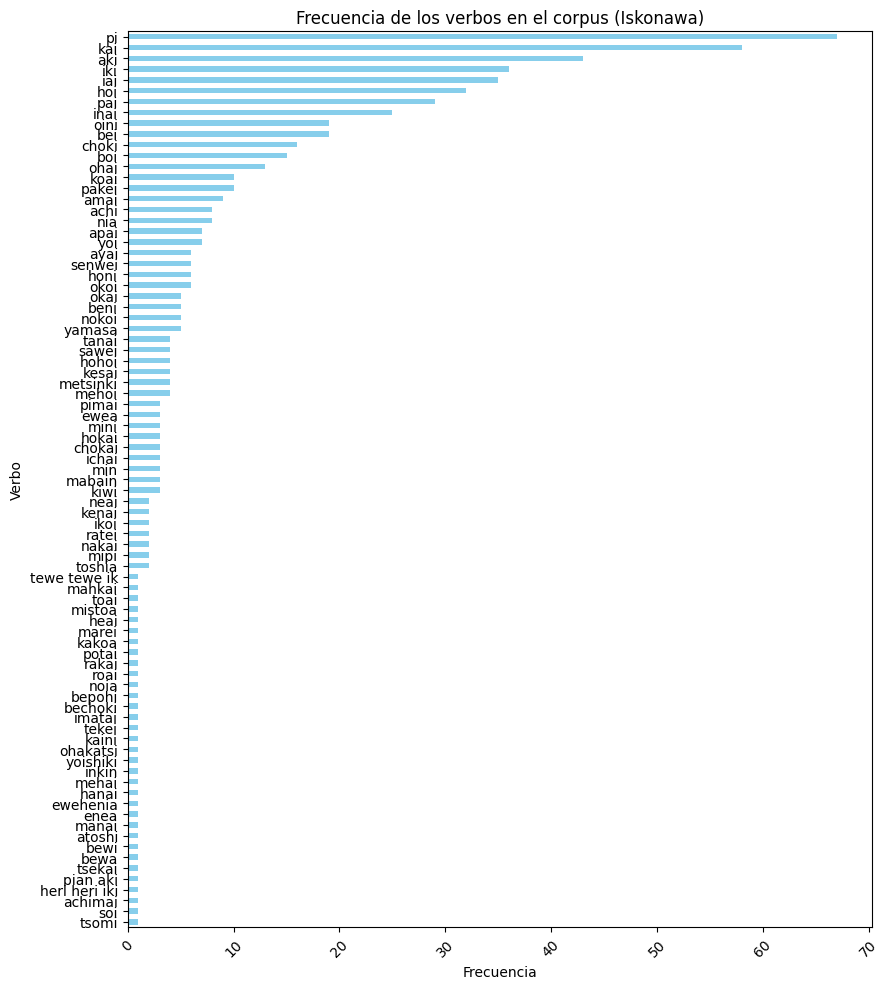

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.DataFrame(data_temp)

# Expand the list of verbs in 'found_verbs' and count their frequencies
all_verbs = [verb for sublist in df['found_verbs'] for verb in sublist]
verb_counts = pd.Series(Counter(all_verbs))

verb_counts = verb_counts.sort_values(ascending=True)

# Crear el gráfico de barras
plt.figure(figsize=(9, 10))
verb_counts.plot(kind='barh', color='skyblue')
plt.title('Frecuencia de los verbos en el corpus (Iskonawa)')
plt.ylabel('Verbo')
plt.xlabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico

print(verb_counts.shape)
plt.show()

In [50]:
abrev_to_full = {
  ">": "Cambio de referencia",
  "1": "Primera persona",
  "2": "Segunda persona",
  "3": "Tercera persona",
  "A": "Sujeto de verbo transitivo",
  "ABLA": "Ablativo",
  "ABS": "Absolutivo",
  "ACU": "Acusativo",
  "ANDA": "Andativo",
  "ASER": "[MODO] Asertivo",
  "ASOC": "Asociativo",
  "BEN": "Benefactivo",
  "CAU.DIR": "Causativo directo",
  "CAUS": "Causativo",
  "COM": "Comitativo",
  "COMP": "Comparativo",
  "COP": "Cópula",
  "CP": "Concordancia del participante",
  "DES": "[MODO] Desiderativo",
  "DESIN": "Desintensificador",
  "DIM": "Diminutivo",
  "DIR": "Direccional",
  "DIST": "Distributivo",
  "DUB": "[MODO] Dubitativo",
  "DUR": "[ASPECTO] Durativo",
  "ENF": "Enfático",
  "ERG": "Ergativo",
  "EST": "Estativo",
  "EVI.1": "[Evidencialidad] Evidencial de primera mano",
  "EVI.2": "[Evidencialidad] Evidencial de segunda mano",
  "EXH": "Exhortativo",
  "FOC": "Foco",
  "FUT": "[TIEMPO] Futuro",
  "FUT.INM": "[TIEMPO] Futuro inmediato",
  "GEN": "Genitivo",
  "HAB": "[ASPECTO] Habitual",
  "IMP": "[MODO] Imperativo",
  "IMPF": "[ASPECTO] Imperfectivo",
  "IND": "[MODO] Indicativo",
  "INST": "Instrumental",
  "INT": "[TRANSITIVIDAD] Intransitivo",
  "LOC": "Locativo",
  "LOC.IND": "Locativo indirecto",
  "MAL": "Malefactivo",
  "NEG": "Negativo",
  "NOM": "Nominativo",
  "NOMLZ": "Nominalizador",
  "OBJ": "Objeto (tanto de verbo transitivo como ditransitivo)",
  "P": "Objeto de verbo transitivo",
  "PAS": "[TIEMPO] Pasado",
  "PAS.REM": "[TIEMPO] Pasado remoto",
  "PERF": "[ASPECTO] Perfectivo",
  "PLU": "[NUMERO] Plural",
  "POS": "Posesivo",
  "PROG": "Estativo",
  "PROP": "Propietivo",
  "PROPO": "Propositivo",
  "R": "Objeto de tipo receptor en una cláusula ditransitiva",
  "REC": "Recíproco",
  "REFL": "Reflexivo",
  "S": "Sujeto de verbo intransitivo",
  "SG": "[TIEMPO] Singular",
  "SUJ": "Sujeto (tanto de verbo transitivo como intransitivo)",
  "SUJ.DIF": "Sujetos diferentes",
  "SUJ.IDEN": "Sujetos idénticos",
  "T": "Objeto de tipo tema en una cláusula ditransitiva",
  "TOP": "Tópico",
  "TOP.CON": "Tópico continuado",
  "TOP.DIF": "Tópico diferente",
  "TRAN": "[TRANSITIVIDAD] Transitivo",
  "VEN": "Venitivo",
  "PF": "[ASPECTO] Perfectivo",
  "EVID1": "[Evidencialidad] Evidencial de primera mano",
}

(23,)


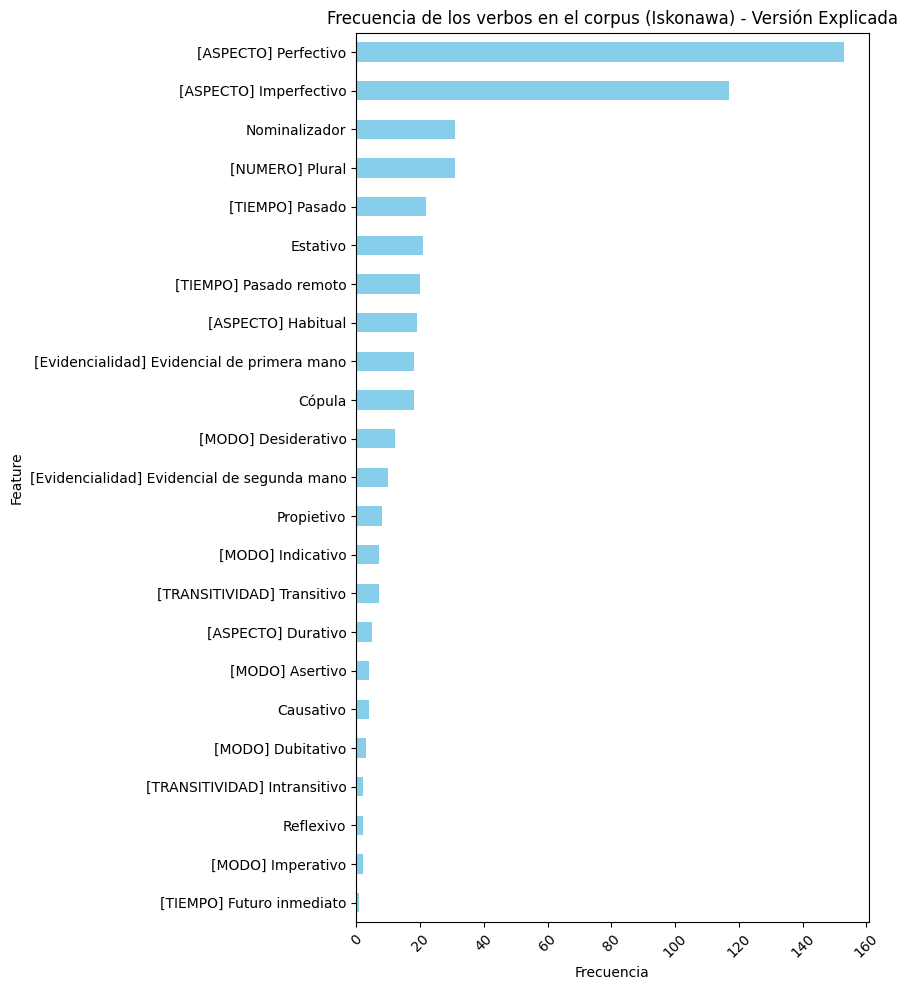

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.DataFrame(data_temp)

# Crear una nueva columna en el DataFrame para mostrar las versiones completas
df['verb_features_expanded'] = df['verb_features'].apply(lambda x: [abrev_to_full.get(verb, verb) for verb in x])

# Expand the list of verbs in the new 'verb_features_expanded' column and count their frequencies
all_verbs_expanded = [verb for sublist in df['verb_features_expanded'] for verb in sublist]
verb_counts_expanded = pd.Series(Counter(all_verbs_expanded))

verb_counts_expanded = verb_counts_expanded.sort_values(ascending=True)

# Crear el gráfico de barras
plt.figure(figsize=(9, 10))
verb_counts_expanded.plot(kind='barh', color='skyblue')
plt.title('Frecuencia de los verbos en el corpus (Iskonawa) - Versión Explicada')
plt.ylabel('Feature')
plt.xlabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
print(verb_counts_expanded.shape)
plt.show()

In [32]:
print(verb_counts_expanded)

Futuro inmediato                1
Imperativo                      2
Reflexivo                       2
Intransitivo                    2
Dubitativo                      3
Causativo                       4
Asertivo                        4
Durativo                        5
Transitivo                      7
Indicativo                      7
Propietivo                      8
Evidencial de segunda mano     10
Desiderativo                   12
Cópula                         18
Evidencial de primera mano     18
Habitual                       19
Pasado remoto                  20
Estativo                       21
Pasado                         22
Plural                         31
Nominalizador                  31
Imperfectivo                  117
Perfectivo                    153
dtype: int64


In [3]:
# Suponiendo que df es tu DataFrame original
# Asegúrate de que la estructura de 'verbs_details' es consistente y maneja casos donde puedan faltar datos
def extract_verb_detail(verb_details, key, pos=0):
    try:
        if verb_details and key in verb_details[0] and len(verb_details[0][key]) > pos:
            return verb_details[0][key][pos]
        return 'None'
    except IndexError:
        return 'None'
    
df = pd.DataFrame()

df['tense'] = data['verbs_details'].apply(lambda x: extract_verb_detail(x, 'Tense'))
df['person'] = data['verbs_details'].apply(lambda x: extract_verb_detail(x, 'Person'))
df['number'] = data['verbs_details'].apply(lambda x: extract_verb_detail(x, 'Number'))
df['mood'] = data['verbs_details'].apply(lambda x: extract_verb_detail(x, 'Mood'))
df['aspect'] = data['verbs_details'].apply(lambda x: extract_verb_detail(x, 'Aspect') if x and 'Aspect' in x[0] and x[0]['Aspect'] else 'None')
df['transitivity'] = data['verbs_details'].apply(lambda x: extract_verb_detail(x, 'Transitivity'))

# print(df['tense'].value_counts())
print(df.shape)


(163, 6)


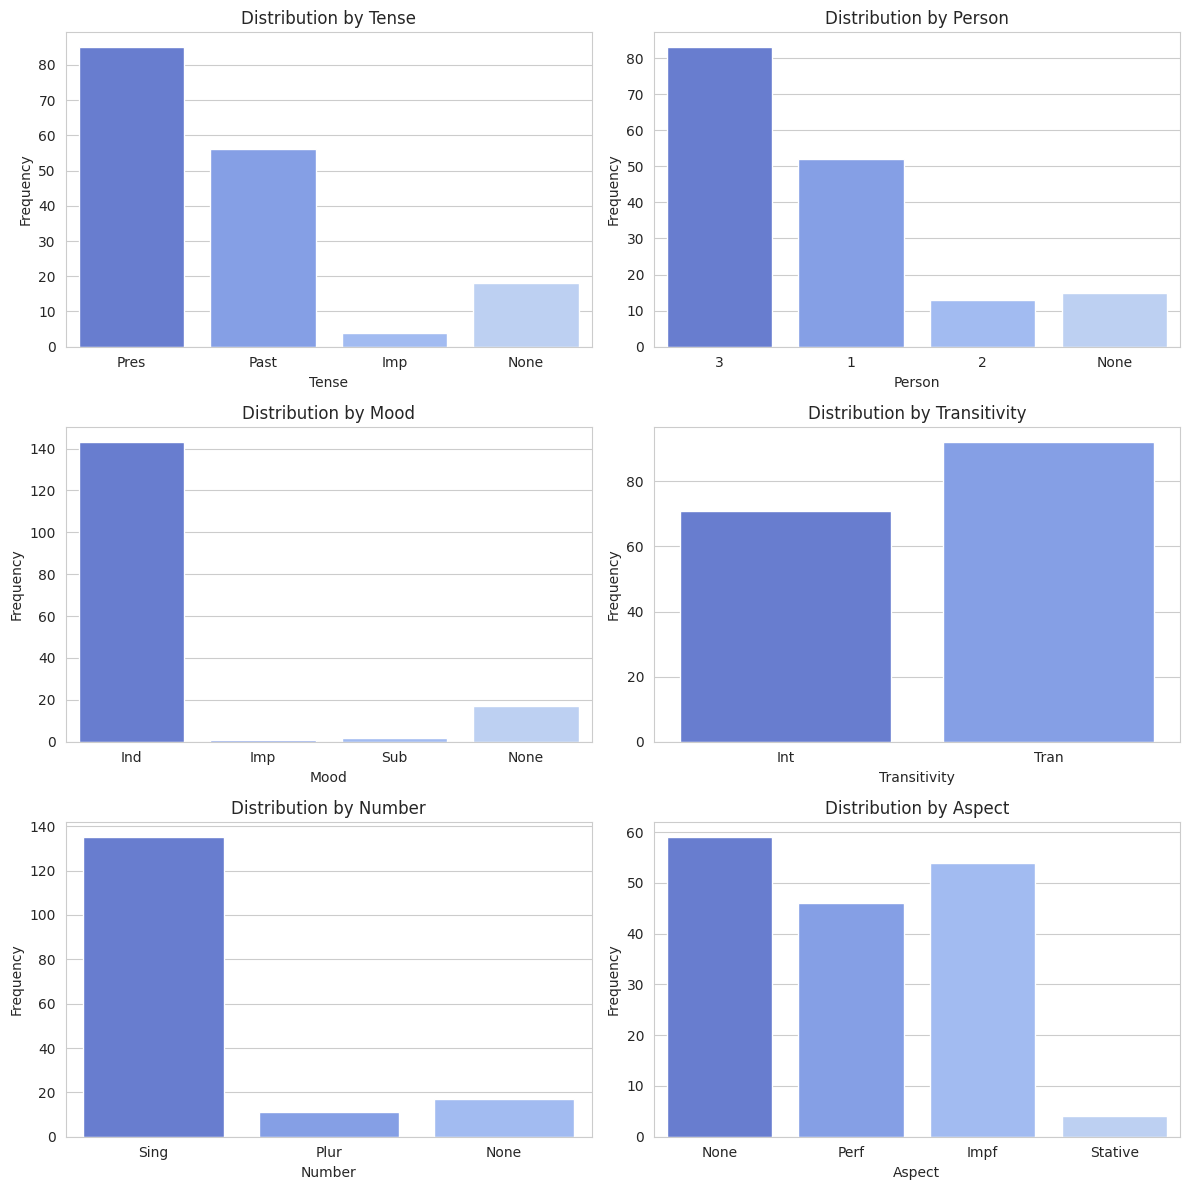

In [4]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set a color palette
palette = sns.color_palette("coolwarm", 10)  # Increased to a larger number for variety

# Adjust the size of the plots
plt.figure(figsize=(12, 12))  # Adjusted size for six plots

# Define a function to plot count plots
def plot_countplot(ax, data, x, palette, title, xlabel, ylabel):
    unique_values = data[x].nunique()
    sns.countplot(x=x, data=data, ax=ax, hue=x, palette=palette[:unique_values], legend=False)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Create subplots
ax1 = plt.subplot(3, 2, 1)
plot_countplot(ax1, df, 'tense', palette, 'Distribution by Tense', 'Tense', 'Frequency')

ax2 = plt.subplot(3, 2, 2)
plot_countplot(ax2, df, 'person', palette, 'Distribution by Person', 'Person', 'Frequency')

ax3 = plt.subplot(3, 2, 3)
plot_countplot(ax3, df, 'mood', palette, 'Distribution by Mood', 'Mood', 'Frequency')

ax4 = plt.subplot(3, 2, 4)
plot_countplot(ax4, df, 'transitivity', palette, 'Distribution by Transitivity', 'Transitivity', 'Frequency')

ax5 = plt.subplot(3, 2, 5)
plot_countplot(ax5, df, 'number', palette, 'Distribution by Number', 'Number', 'Frequency')

ax6 = plt.subplot(3, 2, 6)
plot_countplot(ax6, df, 'aspect', palette, 'Distribution by Aspect', 'Aspect', 'Frequency')

plt.tight_layout()
plt.show()

Cantidad de lemmas: 52


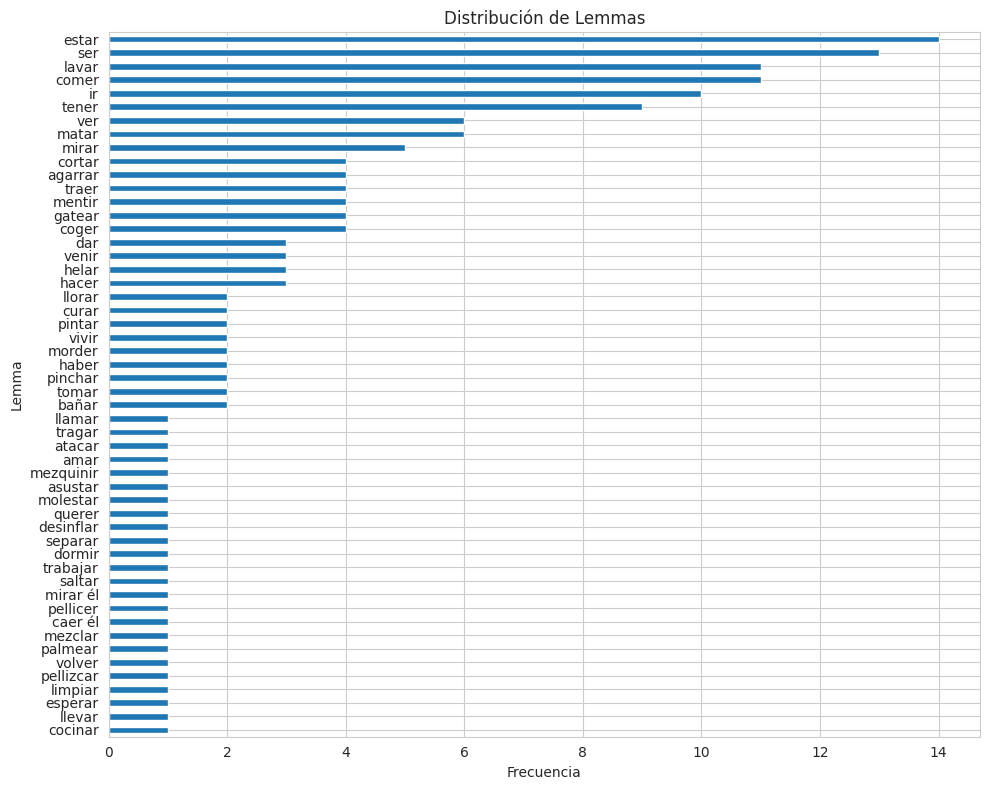

In [5]:
# Extraer la lista de lemmas desde la clave 'verbs_info'
lemmas = data['verbs_info'].apply(lambda x: [info['Lemma'] for info in x])

# Aplanar la lista de listas en una sola lista
all_lemmas = [lemma for sublist in lemmas for lemma in sublist]

# Crear un DataFrame con la distribución de los lemmas
lemma_distribution = pd.Series(all_lemmas).value_counts()

# Ordenar la distribución de lemmas de mayor a menor
lemma_distribution_sorted = lemma_distribution.sort_values(ascending=True)

# Crear el gráfico de barras horizontales para la distribución de lemmas
plt.figure(figsize=(10, 8))
lemma_distribution_sorted.plot(kind='barh')

# Añadir título y etiquetas
plt.title('Distribución de Lemmas')
plt.xlabel('Frecuencia')
plt.ylabel('Lemma')

# Ajustar el layout para evitar que se corten etiquetas
plt.tight_layout()

# Mostrar cantidad de lemmas
print('Cantidad de lemmas:', len(lemma_distribution))

# Mostrar el gráfico
plt.show()


Number of lemmas: 52


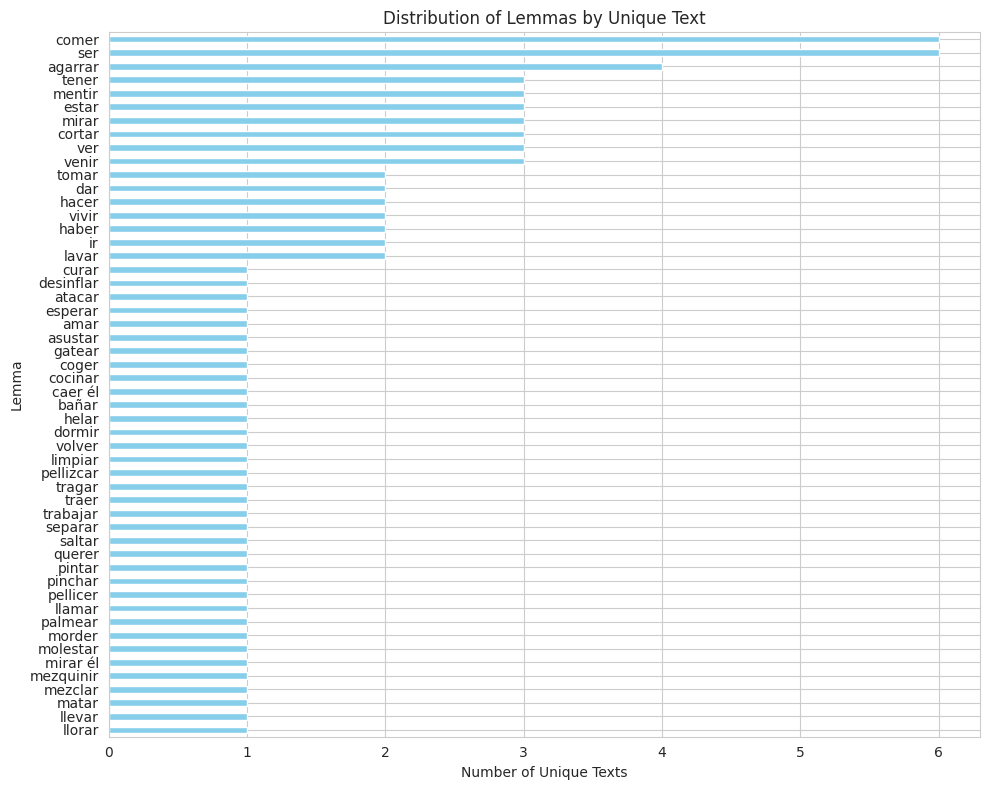

In [6]:
# Suponiendo que 'data' es tu DataFrame y que 'verbs_info' es una columna adecuada
# Extraer la lista de Lemma y Text desde la clave 'verbs_info'
lemma_text_pairs = data['verbs_info'].apply(lambda x: [(info['Lemma'], info['Text']) for info in x])

# Aplanar la lista de listas en una sola lista de tuplas (Lemma, Text)
all_lemma_text = [item for sublist in lemma_text_pairs for item in sublist]

# Convertir en un DataFrame para trabajar con los datos
lemma_text_df = pd.DataFrame(all_lemma_text, columns=['Lemma', 'Text'])

# Agrupar por Lemma y contar cuántos Text únicos tiene cada Lemma
lemma_text_unique_count = lemma_text_df.groupby('Lemma')['Text'].nunique().reset_index(name='Unique Text Count')

# Ordenar la distribución de lemmas de mayor a menor
lemma_text_unique_count_sorted = lemma_text_unique_count.sort_values(by='Unique Text Count', ascending=True)

# Convertir 'Lemma' en índice para que se muestre correctamente en el eje y del gráfico
lemma_text_unique_count_sorted.set_index('Lemma', inplace=True)

# Crear el gráfico de barras horizontales para la distribución de lemmas
plt.figure(figsize=(10, 8))
lemma_text_unique_count_sorted['Unique Text Count'].plot(kind='barh', color='skyblue')

# Añadir título y etiquetas
plt.title('Distribution of Lemmas by Unique Text')
plt.xlabel('Number of Unique Texts')
plt.ylabel('Lemma')

# Ajustar el layout para evitar que se corten etiquetas
plt.tight_layout()

# Mostrar cantidad de lemmas
print('Number of lemmas:', len(lemma_text_unique_count))

# Mostrar el gráfico
plt.show()